# 音声分析
時系列データの一つとして音響データがある。しかし、音響データは統計的な時系列データと異なりデータ数が非常に多く、統計的な時系列データの分析手法と異なる方法が有効になる。また、分析手法を使用することで特徴量を得ることができるため、後に機械学習など数理モデルを作った際にもデータセットとして使用できる。

ここでは、代表的な音響データの分析として「FFT」「STFT」「MFCC」「ZCR」を使用する。

## ライブラリのインポート

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display as display

## データの読み込み

In [2]:
y, sr = librosa.load("riyoukiyaku01kawamoto.mp3")

C:\Users\decar\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


### サンプリングレート

In [3]:
sr

22050

### 音響データをグラフで出力

In [4]:
x = np.linspace(0, len(y)/sr, len(y))

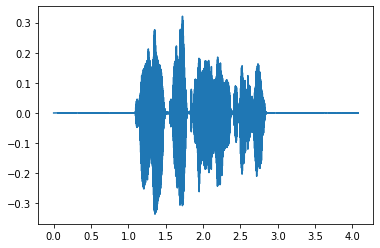

In [5]:
plt.plot(x, y)
plt.show()

## FFT
使用される音響データの中で周波数成分の強さを数値化する。

In [6]:
F = np.fft.fft(y)
amp = np.abs(F)

In [7]:
freq = np.fft.fftfreq(amp.shape[0], d=1.0/sr)

In [8]:
freq

array([ 0.        ,  0.24539263,  0.49078526, ..., -0.73617788,
       -0.49078526, -0.24539263])

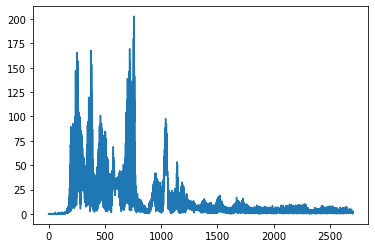

In [9]:
plt.plot(freq[:int(sr/2)], amp[:int(sr/2)])
plt.show()

## STFT
短時間で音響データを区切って時系列データとして周波数成分の強さを分析する。ここではデータについて分かりやすくするため読み込んだ音響の時系列データと一緒にSTFTの時系列データを出力する。

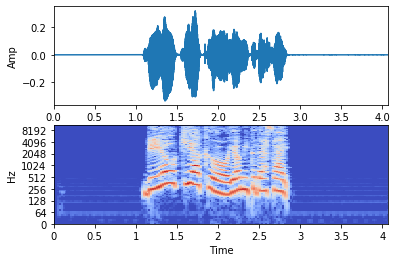

In [10]:
D = librosa.stft(y)
S, phase = librosa.magphase(D)
Sdb = librosa.amplitude_to_db(S)
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("Amp")
plt.xlim(min(x), max(x))
plt.subplot(2, 1, 2)
display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.xlim(min(x), max(x))
plt.show()

このデータについてカラーバーと共に出力する。

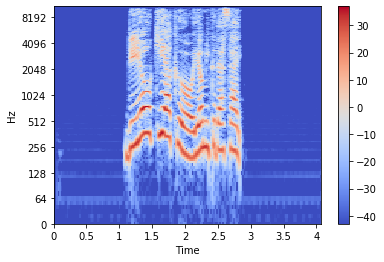

In [11]:
display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.xlim(min(x), max(x))
plt.show()

## MFCC
音響について、人間が理解しやすい形に変換したものになる。

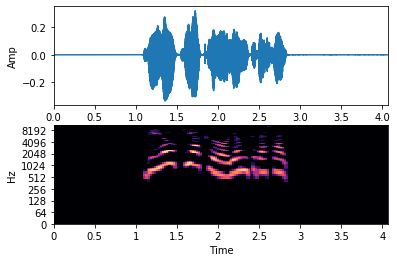

In [12]:
S = librosa.feature.melspectrogram(y, sr=sr)
Sdb = librosa.amplitude_to_db(S, ref=np.max)
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel("time")
plt.ylabel("Amp")
plt.xlim(min(x), max(x))
plt.subplot(2, 1, 2)
display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.xlim(min(x), max(x))
plt.show()

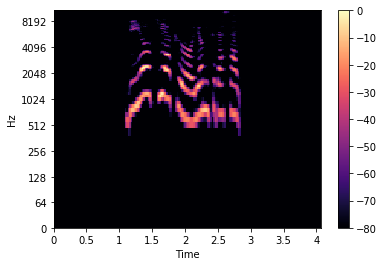

In [13]:
display.specshow(Sdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.xlim(min(x), max(x))
plt.show()

## ZCR
波形データが0を境に上下した回数を使用する。ここでは無音区間を考慮して1秒から3秒で算出する。

In [14]:
zc = librosa.zero_crossings(y, pad=False)
zc_bin = np.where(zc==True, 1, 0)
sum(zc_bin[int(len(zc)/4):int(3*(len(zc)/4))])

5925